In [2]:
from utils import *
from tests import *
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


########## LOADING THE IMAGE ##############
1226
1991
########## CROPPING THE IMAGE ##############
(54, 224, 224, 1)
Loading /media/maewanto/B498-74ED/Data_projet_apprentissage/models/model_yang.json
Loading /media/maewanto/B498-74ED/Data_projet_apprentissage/models_weights/model_yang_weights.hdf5
########## PREDICTING THE CROPS ##############
########## RECONSTITUTING THE IMAGE ##############


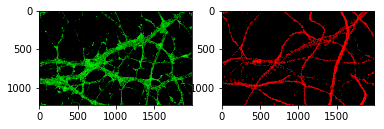

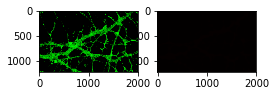

ValueError: not enough values to unpack (expected 3, got 2)

In [10]:
actin, axon, dendrite = test_image(120, "model_yang", thresh_results=False, batch_size=16)

In [11]:
from multi_testing import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
models_to_test = [
    {
        'name': 'model_yang',
        'return_all': False,
        'nb_examples': 7,
        'validation_split': 0.3,
        'epochs': 3,
        'batch_size': 2,
        'use_saved_weights': False,
        'channel': 'axons'
    },
    {
        'name': 'model_yang_with_conv2dtranspose',
        'return_all': False,
        'nb_examples': 7,
        'validation_split': 0.3,
        'epochs': 3,
        'batch_size': 2,
        'use_saved_weights': False,
        'channel': 'axons'
    }
]

run_multi_tests(models_to_test)

######## TESTING MODEL model_yang #########
######## LOADING THE MODEL ###########
number of training examples = 4
number of test examples = 3
X_train shape: (4, 224, 224, 1)
Y_train shape: (4, 224, 224, 1)
X_test shape: (3, 224, 224, 1)
Y_test shape: (3, 224, 224, 1)


/home/maewanto/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


######## RUNNING THE MODEL ###########


/home/maewanto/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:95: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2 samples, validate on 2 samples
Epoch 1/3
Epoch 00001: val_loss improved from inf to 26.25714, saving model to /media/maewanto/B498-74ED/Data_projet_apprentissage/models_weights/model_yang_weights.hdf5
2/2 [==============================] - 11s 5s/step - loss: 29.0570 - acc: 0.4152 - val_loss: 26.2571 - val_acc: 0.0000e+00
Epoch 2/3
Epoch 00002: val_loss did not improve
2/2 [==============================] - 1s 437ms/step - loss: 22.1030 - acc: 0.7059 - val_loss: 76.6414 - val_acc: 2.9895e-05
Epoch 3/3
Epoch 00003: val_loss did not improve
2/2 [==============================] - 1s 436ms/step - loss: 21.3239 - acc: 0.8101 - val_loss: 97.8049 - val_acc: 0.0000e+00
######## LOADING THE BEST WEIGHTS ###########
######## EVALUATING THE MODEL ###########
3/3 [==============================] - 1s 458ms/step

Loss = 26.2133617401
Test Accuracy = 0.0
######## TESTING MODEL model_yang_with_conv2dtranspose #########
######## LOADING THE MODEL ###########
number of training examples = 4


ZeroDivisionError: float division by zero

In [ ]:
X_train, X_test, y_train, y_test = load_dataset(False, 10)

In [3]:
save_dataset(10, 0.2)

AUGMENTING THE DATA
0
SAVING THE HDF5 FILE
Length: 473
DONE


In [ ]:
min_ones_ratio = 0.1
min_ones = crop_size * min_ones_ratio
cpt = 0
for i in range(0, 1040):
    if i % 10 == 0:
        print(i)
    x = np.load(folder_images_saving_train_x + "/" + str(i) + ".npy")
    y = np.load(folder_images_saving_train_y + "/" + str(i) + ".npy")
    crops_x, crops_y = get_all_crops(x, y)
    length = crops_x.shape[0]
    for j in range(0, length):
        # We do not want to keep too many black crops, so we make sure there is some data in both train and label
        # matrices before taking the flips.
        if np.sum(crops_x[j]) > min_ones and np.sum(crops_y[j, :, :, 0]) > min_ones and np.sum(crops_y[j, :, :, 1]) > min_ones:
            flips_x, flips_y = get_flips_images(crops_x[j], crops_y[j])
            for k in range(0, 3):
                cpt += 1
        else:
            cpt += 1

print("++++")
print(cpt)

In [ ]:
# 118145
with h5py.File(main_folder_path + "/test.hdf5", 'w') as f:
    dataset = f.create_dataset("X", (cpt, crop_size, crop_size, 1))
    
with h5py.File(main_folder_path + "/test.hdf5", 'a') as f:
    f['X'][:10] = np.ones((10, crop_size, crop_size, 1))

# print(dataset.shape)
# dataset[:10]

In [10]:
X_train, X_test, y_train, y_test = load_dataset(False, 473)

/home/maewanto/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


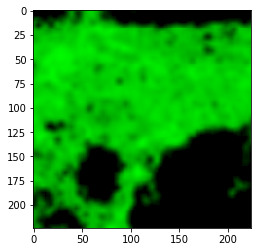

In [13]:
actin, _ = get_images_from_train_label(X_train[102], None)
plt.imshow(actin)
plt.show()